In [7]:
import numpy as np
ar=np.random.randint(1,101,100)
mean_arr=np.mean(ar)
print(mean_arr)
std_ar=np.std(ar)
print(std_ar)
greater_than_mean=ar[ar>mean_arr]
print(greater_than_mean)
new_feature=(ar-mean_arr)/std_ar
print(new_feature)

53.63
27.775044554419708
[ 93 100  84  99  84  84  61  67  81  95  65  73  65  57  57  80  92  88
  77  75  91  62  60  75  56  91  55  57  99  84  97  74  94  76  61  80
  72  67  72  68  63  68  99  69  69  76  96  88  73  92]
[ 1.41745947 -0.05868577 -0.13069286 -1.31880977  1.66948427 -0.99477788
  1.09342759 -0.20269994 -1.57083456 -1.35481331  1.63348073 -0.23870349
 -1.31880977 -0.20269994  1.09342759 -0.05868577 -0.9227708  -1.13879205
 -0.02268223  1.09342759  0.26534611 -0.74275308  0.48136736 -0.85076371
  0.98541696 -0.9227708  -0.02268223 -0.31071057  1.48946656 -0.63474246
 -1.60683811 -1.28280622 -1.31880977 -0.70674954 -0.38271766 -1.35481331
  0.40936028 -0.20269994  0.69738862  0.40936028 -0.38271766  0.12133194
  0.12133194  0.94941342 -0.52673183 -0.27470703  1.38145593  1.23744176
  0.84140279  0.76939571  1.34545239  0.30134965 -0.81476017  0.22934257
  0.76939571  0.0853284  -1.42682039  1.34545239  0.04932485  0.12133194
 -1.82285936  1.63348073  1.09342759  1.5

In [14]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 100

df = pd.DataFrame({
    "age": np.random.randint(18, 61, n),
    "salary": np.random.uniform(3_000_000, 20_000_000, n),
    "experience": np.random.randint(0, 31, n)
})

df.head()
df["salary_per_year_experience"] = None
mean_salary=df["salary"].mean()
print(mean_salary)

correlation_matrix=df.corr(numeric_only=True)
correlation_matrix



11110616.011177521


,age,salary,experience
age,1.000000,0.035520,-0.226072
salary,0.035520,1.000000,0.054973
experience,-0.226072,0.054973,1.000000


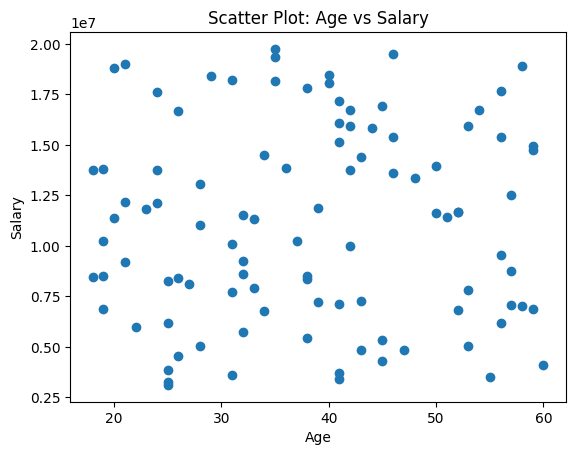

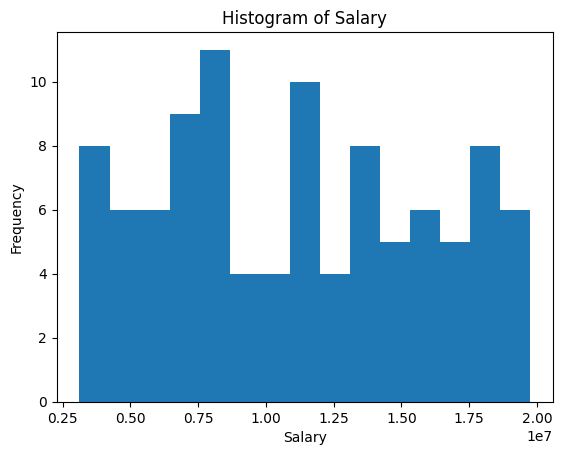

Skewness: 0.09902856502019473
Kurtosis: -1.1890019441883077
p-value: 1.0076012279398672e-07
Distribution is NOT Normal


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Create DataFrame
np.random.seed(42)
n = 100

df = pd.DataFrame({
    "age": np.random.randint(18, 61, n),
    "salary": np.random.uniform(3_000_000, 20_000_000, n),
    "experience": np.random.randint(0, 31, n)
})

#  Scatter plot: age vs salary
plt.figure()
plt.scatter(df["age"], df["salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot: Age vs Salary")
plt.show()

#  Histogram of salary
plt.figure()
plt.hist(df["salary"], bins=15)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Salary")
plt.show()

#  Normality check
stat, p = normaltest(df["salary"])

print("Skewness:", df["salary"].skew())
print("Kurtosis:", df["salary"].kurt())
print("p-value:", p)

if p > 0.05:
    print("Distribution looks Normal")
else:
    print("Distribution is NOT Normal")


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
n=100
df=pd.DataFrame({
    "age": np.random.randint(18, 61, n),
    "salary": np.random.uniform(3_000_000, 20_000_000, n),
    "experience": np.random.randint(0, 31, n)
})
x=df[["age","experience"]]
y=df["salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R²:", r2)
print(f"intercept:",model.intercept_)
print("age coefficient:", model.coef_[0])
print("experience coefficient:", model.coef_[1])

R²: -0.04254771147987091
intercept: 11736894.411639797
age coefficient: -18474.060793721936
experience coefficient: 4968.805158637893


accuracy: 0.55
confusion Matrix:
[[3 7]
 [2 8]]


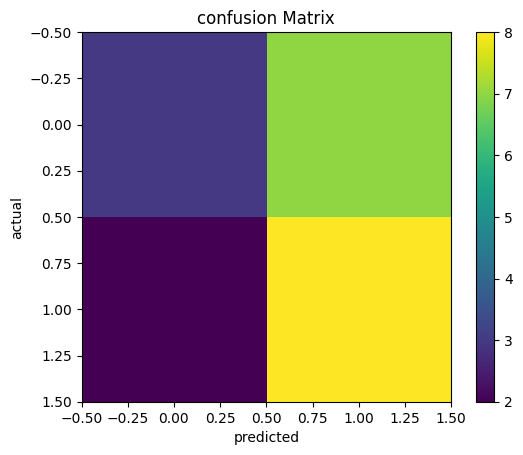

precision: 0.5333333333333333
recall: 0.8


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


np.random.seed(42)
n = 100
df = pd.DataFrame({
    "age": np.random.randint(18, 61, n),
    "salary": np.random.uniform(3_000_000, 20_000_000, n),
    "experience": np.random.randint(0, 31, n)
})


mean_salary = df["salary"].mean()
df["high_salary"] = (df["salary"] > mean_salary).astype(int)


x= df[["age", "experience"]]
y = df["high_salary"]


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc)


cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix:")
print(cm)


plt.figure()
plt.imshow(cm)
plt.title("confusion Matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.colorbar()
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("precision:", precision)
print("recall:", recall)
